<img src="https://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Risk Parity & Budgeting with Python

### Mean-Variance Optimal Portfolio

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

http://tpq.io | [@dyjh](http://twitter.com/dyjh) | [team@tpq.io](mailto:team@tpq.io) 

<img src="http://hilpisch.com/images/py4fi_2nd.png" width="20%" align="left">

## Financial Assets

In [1]:
import math
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
np.set_printoptions(suppress=True)
%config InlineBackend.figure_format = 'svg'

In [2]:
url = 'universe.csv'

In [3]:
data = pd.read_csv(url, index_col=0, parse_dates=True)
data = data.loc['2019-1-1':]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 977 entries, 2019-01-02 to 2022-11-15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AAPL.US     977 non-null    float64
 1   GSPC.INDX   977 non-null    float64
 2   GC.COMM     977 non-null    float64
 3   BTC-USD.CC  977 non-null    float64
dtypes: float64(4)
memory usage: 38.2 KB


In [5]:
data.head()

,AAPL.US,GSPC.INDX,GC.COMM,BTC-USD.CC
date,,,,
2019-01-02,38.1051,2510.0300,1281.0,3941.991221
2019-01-03,34.3096,2447.8899,1291.8,3838.449328
2019-01-04,35.7742,2531.9399,1282.7,3858.464423
2019-01-07,35.6946,2549.6899,1286.8,4008.938531
2019-01-08,36.3751,2574.4099,1283.2,4015.950226


### Returns

In [6]:
rets = np.log(data / data.shift(1))  # daily log returns
rets.head()

,AAPL.US,GSPC.INDX,GC.COMM,BTC-USD.CC
date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.104923,-0.025068,0.008396,-0.026618
2019-01-04,0.041802,0.033759,-0.007069,0.005201
2019-01-07,-0.002228,0.006986,0.003191,0.038257
2019-01-08,0.018885,0.009649,-0.002802,0.001747


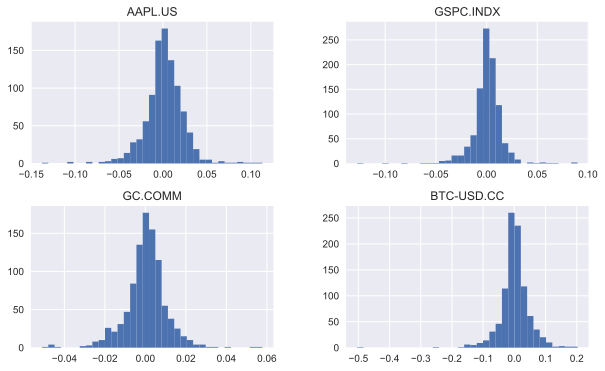

In [7]:
rets.hist(figsize=(10, 6), bins=35);

In [8]:
np.sqrt(rets.var() * 252)  # annualized volatility

AAPL.US       0.346660
GSPC.INDX     0.231489
GC.COMM       0.162769
BTC-USD.CC    0.742460
dtype: float64

## Portfolio Return

In [9]:
noa = data.shape[1]
noa

4

In [10]:
phi = np.ones(noa) / noa  # equally weighted portfolio
phi

array([0.25, 0.25, 0.25, 0.25])

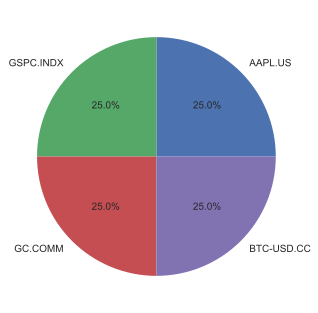

In [11]:
plt.pie(phi, labels=data.columns, autopct='%1.1f%%');

In [12]:
def port_return(phi):
    return np.dot(rets.mean() * 252, phi)

In [13]:
port_return(phi)

0.23332487194130186

## Portfolio Risk

In [14]:
def port_risk(phi):
    return math.sqrt(np.dot(phi, np.dot(rets.cov() * 252, phi)))

In [15]:
port_risk(phi)

0.2719582010027906

In [16]:
rets.corr()

,AAPL.US,GSPC.INDX,GC.COMM,BTC-USD.CC
AAPL.US,1.000000,0.811196,0.063683,0.262063
GSPC.INDX,0.811196,1.000000,0.090818,0.344341
GC.COMM,0.063683,0.090818,1.000000,0.142290
BTC-USD.CC,0.262063,0.344341,0.142290,1.000000


## Maximum Sharpe Portfolio

In [17]:
from scipy.optimize import minimize

In [18]:
def sharpe(phi):
    return port_return(phi) / port_risk(phi)

In [19]:
sharpe(phi)

0.8579438718191391

In [20]:
bnds = noa * [(0, 1)]
bnds

[(0, 1), (0, 1), (0, 1), (0, 1)]

In [21]:
cons = {'type': 'eq', 'fun': lambda phi: phi.sum() - 1}

In [22]:
opt = minimize(lambda phi: -sharpe(phi), phi,
               bounds=bnds,
               constraints=cons)
opt

     fun: -1.1324795827427787
     jac: array([-0.00063266,  0.40558076,  0.00056244,  0.00088246])
 message: 'Optimization terminated successfully.'
    nfev: 43
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.48334513, 0.        , 0.4690595 , 0.04759537])

In [23]:
phi_ = opt['x']
phi_

array([0.48334513, 0.        , 0.4690595 , 0.04759537])

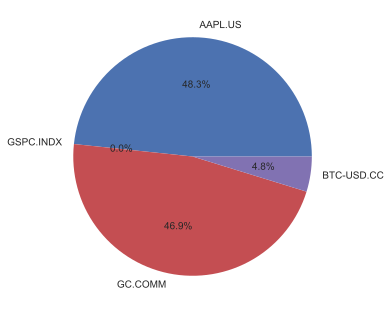

In [24]:
plt.pie(phi_, labels=data.columns, autopct='%1.1f%%');

In [25]:
sharpe(phi_)  # maximum Sharpe ratio

1.1324795827427787

In [26]:
port_return(phi_)

0.2283386533733497

In [27]:
port_risk(phi_)

0.20162717001955213

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="30%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>